<a href="https://colab.research.google.com/github/longhai2003/Timeseries/blob/main/NguyenLongHai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

file_path = "/content/AUDUSD_series.csv"
df = pd.read_csv(file_path)

df.head()


,Date,AUDUSD_Open,AUDUSD_High,AUDUSD_Low,AUDUSD_Close,AUDUSD_Adj Close
0,2006-05-16,0.762835,0.768994,0.760688,0.767106,0.767106
1,2006-05-17,0.766871,0.772618,0.757576,0.759417,0.759417
2,2006-05-18,0.759417,0.767577,0.758725,0.764000,0.764000
3,2006-05-19,0.763884,0.764818,0.753012,0.757174,0.757174
4,2006-05-22,0.756888,0.756888,0.747105,0.753409,0.753409


In [13]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.reset_index(inplace=True)

series = df['AUDUSD_Adj Close'].dropna()

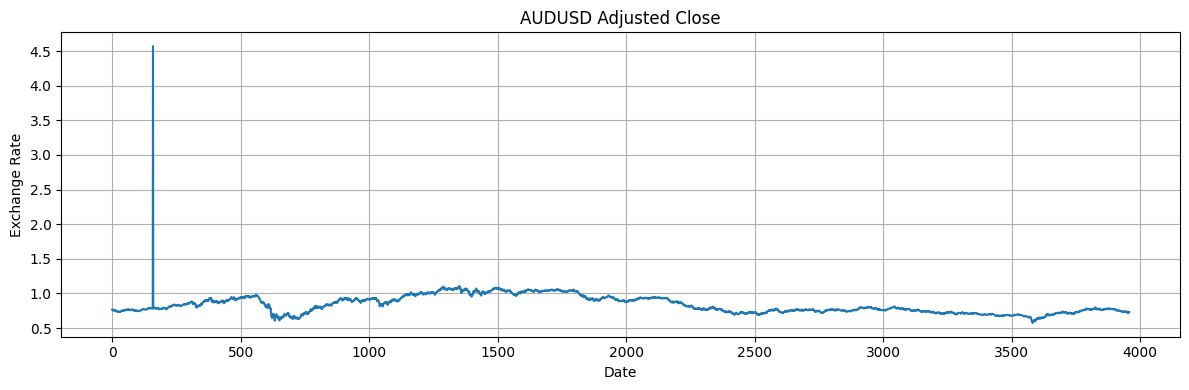

In [15]:
plt.figure(figsize=(12, 4))
plt.plot(series)
plt.title('AUDUSD Adjusted Close')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

AR1

In [16]:
model = sm.tsa.ARIMA(series, order=(1, 0, 0))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       AUDUSD_Adj Close   No. Observations:                 3958
Model:                 ARIMA(1, 0, 0)   Log Likelihood                4333.914
Date:                Tue, 03 Jun 2025   AIC                          -8661.828
Time:                        10:19:05   BIC                          -8642.978
Sample:                             0   HQIC                         -8655.142
                               - 3958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8335      0.021     39.744      0.000       0.792       0.875
ar.L1          0.7973      0.002    363.923      0.000       0.793       0.802
sigma2         0.0066   1.63e-05    401.404      0.000       0.007       0.007
===================================================================================
Ljung-Box (L1) (Q):                 489.91   Jarque-Bera (JB):         471337022.77
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.03   Skew:                            12.41
Prob(H) (two-sided):                  0.00   Kurtosis:                      1693.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""